<a href="https://colab.research.google.com/github/aqilaaprillia/MachineLearning/blob/main/ML_MidProjcet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Kelompok CAR_SALES:**
    1. Ariandini Aulia Bachry - H071201054
    2. Muhammad Idham Anugerah - H071201060
    3. A. Fuad Ahsan Basir - H071201076
    4. Nur Aqila Aprilia - H071201088

# Pre-Processing

**Import Library**

Penggunaan library pada Python memberikan kemudahan dalam proses data understanding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Memanggil file (load dataset) dengan format .csv untuk dataset mengenai car sales yang sudah di unduh dari Kaggle, dan akan disimpan di dalam dataframe df. Lalu tampilkan 5 baris awal dataset dengan function head

In [ ]:
df = pd.read_csv("car_sales.csv")#Panggil file  dan simpan dalam dataframe Lalu 
df.head() #tampilkan 5 baris awal dataset dengan function head()


#prediksi harga mobil 
# feature :data yang tersedia (x variable)
# label : yang di prediksi (y variable ) : price

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


**Method "describe"**

secara otomatis melakukan komputasi statistik untuk semua continous variable. Secara default "describe" melakukan ignore terhadap variabel bertype objek.

Komputasi statistik yang dilakukan terdiri dari: count, mean, std, min, max, 25%, 75%, max.

In [ ]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Menampilkan 5 baris awal dataset

In [ ]:
df.head() #tampilkan 5 baris awal dataset dengan function head()
#kolom Model telah hilang 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


Menampilkan ukuran (jumlah baris, kolom) dari dataset. Dengan menggunakan method function


In [ ]:
df.shape

(4345, 9)

## Korelasi Data

**Korelasi Menyatakan bagaimana fitur terkait satu sama lain**

Mengitung korelasi dari dataset. Dengan menggunakan method function

In [ ]:
df.corr()

,Price,Mileage,EngineV,Year
Price,1.000000,-0.464795,0.058664,0.487031
Mileage,-0.464795,1.000000,0.020959,-0.668635
EngineV,0.058664,0.020959,1.000000,-0.022866
Year,0.487031,-0.668635,-0.022866,1.000000


## Menangani Outlier

**Outlier adalah data yang memiliki skor ekstrem, baik ekstrem tinggi maupun ekstrem rendah**


adanya outliers dapat membuat distribusi skor cenderung ke kiri atau ke kanan

data yang jauh dari gerombolan mau disingkirkan

In [ ]:
df_no_outlier = df.copy()

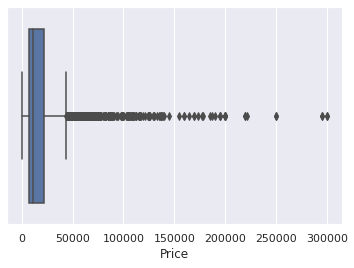

In [ ]:
sns.boxplot(x=df["Price"])

In [ ]:
df_no_outlier.drop(df_no_outlier[(df_no_outlier['Price']>200000)].index, inplace=True)

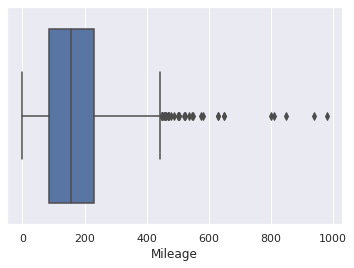

In [ ]:
sns.boxplot(x=df["Mileage"])

In [ ]:
df_no_outlier.drop(df_no_outlier[(df_no_outlier['Mileage']>600)].index, inplace=True)

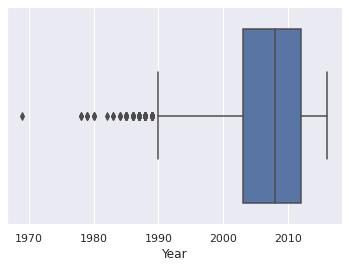

In [ ]:
sns.boxplot(x=df["Year"])

In [ ]:
df_no_outlier.drop(df_no_outlier[(df_no_outlier['Year']<1970)].index, inplace=True)

In [ ]:
df_outlier = df[["Price", "Mileage", "Year"]]
df_outlier

,Price,Mileage,Year
0,4200.0,277,1991
1,7900.0,427,1999
2,13300.0,358,2003
3,23000.0,240,2007
4,18300.0,120,2011
...,...,...,...
4340,125000.0,9,2014
4341,6500.0,1,1999
4342,8000.0,194,1985
4343,14200.0,31,2014


In [ ]:
df_no_outlier.shape

(4326, 9)

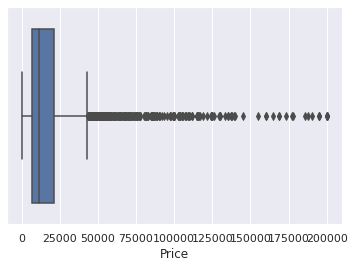

In [ ]:
sns.boxplot(x=df_no_outlier["Price"])

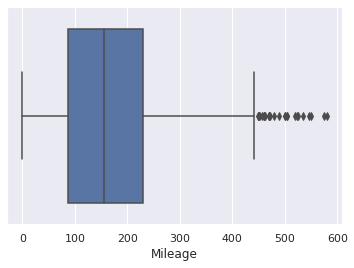

In [ ]:
sns.boxplot(x=df_no_outlier["Mileage"])

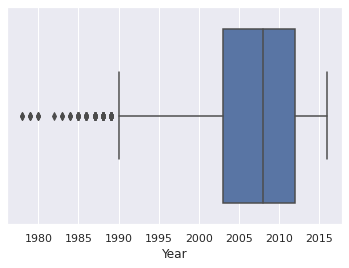

In [ ]:
sns.boxplot(x=df_no_outlier["Year"])

## Menangani Missing Value

In [ ]:
df_no_outlier.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         147
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [ ]:
df_no_mv = df_no_outlier.copy()

In [ ]:
df_no_mv["EngineV"].fillna(df_no_mv["EngineV"].mean(), inplace=True)

In [ ]:
df_no_mv = df_no_mv.dropna()

In [ ]:
df_no_mv.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [ ]:
df.dtypes

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

In [ ]:
df_no_mv.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Feature dan Label

In [ ]:
X = df_no_mv.drop(['Price'], axis=1) #price klabel jadi di drop
y = df_no_mv['Price']

## Label Encoding

untuk melatih model regresi, data yang di latih harus bertipe numerik. Maka dari itu data yang bertipe data object harus ditransformasikan terlebih dahulu.



In [ ]:
X.dtypes

Brand            object
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

In [ ]:
cat_columns = X.columns[(X.dtypes =='object').values].tolist()
cat_columns

['Brand', 'Body', 'Engine Type', 'Registration', 'Model']

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
        X[col] = LabelEncoder().fit_transform(X[col])
X.head()  

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,1,3,277,2.0,3,1,1991,18
1,2,5,427,2.9,0,1,1999,264
2,2,3,358,5.0,1,1,2003,236
3,0,0,240,4.2,3,1,2007,223
4,5,0,120,2.0,3,1,2011,226


# Melatih Model

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

## Decision Tree

semakin tinggi hasil prediksi makin akurat model yang di latih 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=8)
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)

0.836016952828845

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor()
rfreg.fit(X_train, y_train)
rfreg.score(X_test, y_test)

0.9072065936681305